## Lung and Colon Cancer Histopathological Images

### This dataset contains 25,000 histopathological images with 5 classes. 

The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 750 total images of lung tissue (250 benign lung tissue, 250 lung adenocarcinomas, and 250 lung squamous cell carcinomas) and 500 total images of colon tissue (250 benign colon tissue and 250 colon adenocarcinomas) and augmented to 25,000 using the Augmentor package.
There are five classes in the dataset, each with 5,000 images, being:

   * Lung benign tissue
   * Lung adenocarcinoma
   * Lung squamous cell carcinoma
   * Colon adenocarcinoma
   * Colon benign tissue




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers
import cv2
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import splitfolders
from tqdm import tqdm



In [62]:
data_folder= r'D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images'

output = r'D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images\Splitted'

# splitfolders.fixed(data_folder,
#                    output= output,
#                    seed=1337,
#                    fixed=(2000, 1000, 1000),
#                    group_prefix=None,
#                    move=False)



In [5]:
data_folder= r'D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images\Splitted'


train_dir = data_folder + '\\train'
val_dir   = data_folder + '\\val'
test_dir  = data_folder + '\\test'


print(train_dir)
print(val_dir)
print(test_dir)


D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images\Splitted\train
D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images\Splitted\val
D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images\Splitted\test


In [6]:
os.listdir(train_dir)

['Colon adenocarcinoma',
 'Colon benign tissue',
 'Lung adenocarcinoma',
 'Lung benign tissue',
 'Lung squamous carcinoma']

In [7]:
os.chdir(data_folder)
os.getcwd()



'D:\\Programming\\ML\\Datasets\\Lung and Colon Cancer Histopathological Images\\Splitted'

In [8]:
train_images = []
train_labels = [] 

for sub_folder in tqdm(os.listdir(train_dir)):
    sub_path= train_dir +"\\"+ sub_folder
    label= sub_path.split("\\")[-1]

    for img_path in os.listdir(sub_path):
        
        img = sub_path +'\\'+ img_path
        img = cv2.imread(img)       
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float16')
        img = np.array(img)/255.
        train_images.append(img)
        train_labels.append(label)

      



  0%|          | 0/5 [00:00<?, ?it/s]

 20%|██        | 1/5 [00:32<02:10, 32.59s/it]

 40%|████      | 2/5 [01:03<01:35, 31.77s/it]

 60%|██████    | 3/5 [01:37<01:05, 32.86s/it]

 80%|████████  | 4/5 [02:12<00:33, 33.34s/it]

100%|██████████| 5/5 [02:45<00:00, 33.14s/it]


In [9]:
train_images = np.array(train_images)

train_labels = np.array(train_labels)

In [10]:
len(train_images)

10000

In [11]:
len(train_images) , len(train_labels)

(10000, 10000)

In [12]:
train_labels[:5]

array(['Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma', 'Colon adenocarcinoma',
       'Colon adenocarcinoma'], dtype='<U23')

### Viewing some random images 

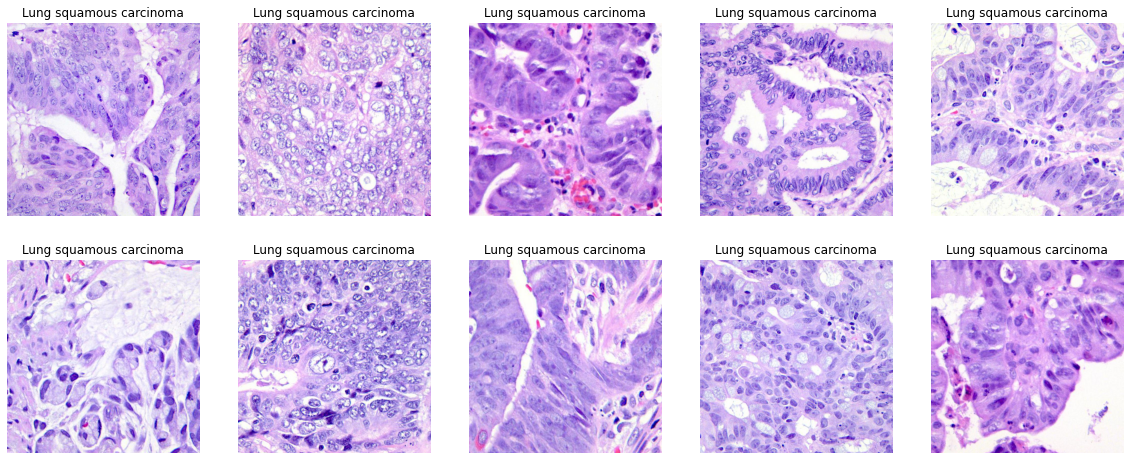

In [98]:
from matplotlib.pyplot import imread

test_folder  = r'D:\Programming\ML\Datasets\Lung and Colon Cancer Histopathological Images\Splitted\test'

plt.figure(figsize=(20 , 8))
for i in range (5):
    
    subfolder = random.choice(os.listdir(test_folder))
    
    cancer_name = os.path.join(test_folder , subfolder)
    
    for i in range (10):
    
        file = random.choice(os.listdir(cancer_name))
        
        image_path = os.path.join(cancer_name , file)

        img = imread(image_path)

        ax = plt.subplot(2 , 5 , i+1)
        
        ax.title.set_text(sub_folder)
        plt.axis('off')

        plt.imshow(img)

In [15]:
val_images = []
val_labels = [] 

for sub_folder in tqdm(os.listdir(val_dir)):
    sub_path= val_dir +"\\"+ sub_folder
    label= sub_path.split("\\")[-1]

    for img_path in os.listdir(sub_path):
        
        img = sub_path +'\\'+ img_path
        img = cv2.imread(img)       
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float16')
        img = np.array(img)/255.
        val_images.append(img)
        val_labels.append(label)

100%|██████████| 5/5 [01:25<00:00, 17.14s/it]


In [16]:
test_images = []
test_labels = [] 

for sub_folder in tqdm(os.listdir(test_dir)):
    sub_path= test_dir +"\\"+ sub_folder
    label= sub_path.split("\\")[-1]

    for img_path in os.listdir(sub_path):
        
        img = sub_path +'\\'+ img_path
        img = cv2.imread(img)       
        img = cv2.resize(img, (224, 224))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.astype('float16')
        img = np.array(img)/255.
        test_images.append(img)
        test_labels.append(label)

100%|██████████| 5/5 [01:28<00:00, 17.62s/it]


In [34]:
test_images = np.array(test_images)

train_labels= np.array(train_labels)

In [35]:
#Encode labels from text to integers.

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [36]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [19]:
## Transfer learning using VGG16 pretrained model.


VGG_model = tf.keras.applications.VGG16(weights='imagenet', 
                                        include_top=False, 
                                        input_shape=(224, 224, 3))


for layer in VGG_model.layers:
    layer.trainable = False
    

In [20]:
x_train[0].shape

(224, 224, 3)

In [33]:
x_test[0].shape

(224, 224, 3)

In [28]:
# use features from convolutional network for RF
with tf.device('/device:CPU:0'):

    feature_extractor= VGG_model.predict(x_train)

313/313 [==============================] - 1394s 4s/step


In [29]:
features = feature_extractor.reshape(feature_extractor.shape[0], -1)

X_for_RF = features # X is the input to RF

In [30]:
#RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

RF_model.fit(X_for_RF, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [37]:
# Sending test data through same feature extractor process

with tf.device('/device:CPU:0'):
    
    X_test_feature = VGG_model.predict(x_test)
 

157/157 [==============================] - 669s 4s/step


In [38]:
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

In [48]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
prediction_RF = le.inverse_transform(prediction_RF)

In [49]:
from sklearn.metrics import accuracy_score

print ("Accuracy = ", accuracy_score(test_labels, prediction_RF))

Accuracy =  0.9402


<AxesSubplot:>

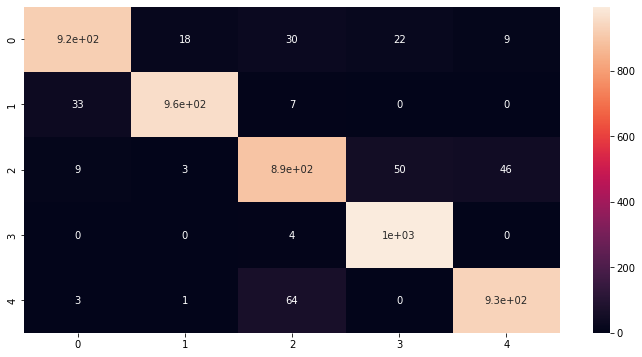

In [43]:

import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,6))
cm = confusion_matrix(test_labels, prediction_RF)

sns.heatmap(cm, annot=True)

In [61]:
for i in range(10):
    n=np.random.randint(0, x_test.shape[0])
    img = x_test[n]
    #plt.imshow(img)
    input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
    input_img_feature=VGG_model.predict(input_img)
    input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
    prediction_RF = RF_model.predict(input_img_features)[0] 
    prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
    print("The prediction for this image is: ", prediction_RF)
    print("The actual label for this image is: ", test_labels[n])
    
    print()

1/1 [==============================] - 0s 20ms/step
The prediction for this image is:  ['Lung adenocarcinoma']
The actual label for this image is:  Lung adenocarcinoma

1/1 [==============================] - 0s 21ms/step
The prediction for this image is:  ['Lung squamous carcinoma']
The actual label for this image is:  Lung squamous carcinoma

1/1 [==============================] - 0s 22ms/step
The prediction for this image is:  ['Lung adenocarcinoma']
The actual label for this image is:  Lung adenocarcinoma

1/1 [==============================] - 0s 21ms/step
The prediction for this image is:  ['Lung squamous carcinoma']
The actual label for this image is:  Lung squamous carcinoma

1/1 [==============================] - 0s 20ms/step
The prediction for this image is:  ['Lung adenocarcinoma']
The actual label for this image is:  Lung adenocarcinoma

1/1 [==============================] - 0s 18ms/step
The prediction for this image is:  ['Lung benign tissue']
The actual label for this ima